In [ ]:
import pandas as pd

# Lecture du fichier CSV
file_path = 'Data_Exercice2.csv'
data = pd.read_csv(file_path, delimiter=';')

# Suppression des espaces insécables
data = data.applymap(lambda x: x.replace('\xa0', ' ') if isinstance(x, str) else x)

# Affichage des premières lignes nettoyées
print(data.head())


# NETTOYAGE DONNEE

import pandas as pd

# Liste des départements français
departements_fr = [str(dep) for dep in range(1, 96)] + ['2A', '2B'] + [str(dep) for dep in range(971, 979)] + [str(dep) for dep in range(986, 989)]

# Définir les conditions pour chaque colonne
conditions = {
    'place': ~(data['place'].between(1, 10)),
    'catu': ~(data['catu'].between(1, 3)),
    'grav': ~(data['grav'].between(1, 4)),
    'an_nais': ~(data['an_nais'].between(1913, 2023)),
    'catv': ~(((data['catv'].between(0, 21)) | (data['catv'].between(30, 43)) | data['catv'].isin([50, 60, 80, 99]))),
    'motor': ~(data['motor'].between(-1, 6)),
    'catr': ~(data['catr'].between(1, 9)),
    'circ': ~(data['circ'].between(-1, 4)),
    'vma': ~(((data['vma'].between(10, 130)) & (data['vma'] % 5 == 0))),
    'lum': ~(data['lum'].between(1, 5)),
    'dep': ~(data['dep'].isin(departements_fr)),
    'agg': ~(data['agg'].isin([1, 2])),
    'atm': ~(data['atm'].between(-1, 9)),
    'col': ~(data['col'].between(-1, 7))
}

# Combinaison de toutes les conditions
condition_totale = pd.Series(False, index=data.index)
for condition in conditions.values():
    condition_totale |= condition

# Supprimer les lignes qui ne respectent pas les conditions
data_filtre = data.drop(data[condition_totale].index)

# Afficher le nombre de lignes supprimées
print("\nNombre de lignes supprimées:", condition_totale.sum())

print('\nIl reste :', len(data_filtre),' lignes dans le fichier\n')



        Num_Acc  id_usager id_vehicule  place  catu  grav  an_nais  catv  \
0  202200000001  1 099 700     813 952      1     1     3   2008.0     2   
1  202200000001  1 099 701     813 953      1     1     1   1948.0     7   
2  202200000002  1 099 698     813 950      1     1     4   1988.0     7   
3  202200000002  1 099 699     813 951      1     1     1   1970.0    10   
4  202200000003  1 099 696     813 948      1     1     1   2002.0     7   

   motor  catr  circ  vma  lum dep    com  agg  atm  col  
0      1     4     2   50    1  26  26198    2    1    3  
1      1     4     2   50    1  26  26198    2    1    3  
2      1     4     2   50    1  25  25204    2    1    3  
3      1     4     2   50    1  25  25204    2    1    3  
4      1     3    -1   50    1  22  22360    2    1    2  

Nombre de lignes supprimées: 10729

Il reste : 115933  lignes dans le fichier



In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données géospatiales des départements français à partir du fichier shapefile
departements = gpd.read_file('departements-20180101.shp')


print(departements.head())
print(departements.columns)

# Agréger les données par département et calculer la gravité moyenne des accidents
departement_gravite = data_filtre.groupby('dep')['grav'].mean().reset_index()

# Joindre les données agrégées avec les géométries des départements
departements = departements.merge(departement_gravite, left_on='code_dept', right_on='dep', how='left')

# Afficher la carte des départements français en colorant les départements en fonction de la gravité des accidents
fig, ax = plt.subplots(figsize=(10, 8))
departements.plot(column='grav', cmap='Reds', linewidth=0.5, edgecolor='black', legend=True, ax=ax)
ax.axis('off')  # Retirer les axes
plt.title('Gravité moyenne des accidents par département')
plt.show()

                                            geometry
0  MULTIPOLYGON (((55.21643 -21.03904, 55.21652 -...
1  POLYGON ((1.68872 43.27368, 1.69001 43.27423, ...
2  POLYGON ((3.08206 45.28988, 3.08209 45.29031, ...
3  MULTIPOLYGON (((4.23014 43.46047, 4.23025 43.4...
4  POLYGON ((-0.14058 44.22648, -0.12931 44.23218...
Index(['geometry'], dtype='object')


KeyError: 'code_dept'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

<class 'pandas.core.frame.DataFrame'>
Index: 115933 entries, 0 to 126661
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Num_Acc      115933 non-null  int64  
 1   id_usager    115933 non-null  object 
 2   id_vehicule  115933 non-null  object 
 3   place        115933 non-null  int64  
 4   catu         115933 non-null  int64  
 5   grav         115933 non-null  int64  
 6   an_nais      115933 non-null  float64
 7   catv         115933 non-null  int64  
 8   motor        115933 non-null  int64  
 9   catr         115933 non-null  int64  
 10  circ         115933 non-null  int64  
 11  vma          115933 non-null  int64  
 12  lum          115933 non-null  int64  
 13  dep          115933 non-null  object 
 14  com          115933 non-null  object 
 15  agg          115933 non-null  int64  
 16  atm          115933 non-null  int64  
 17  col          115933 non-null  int64  
dtypes: float64(1), int64(13), obj

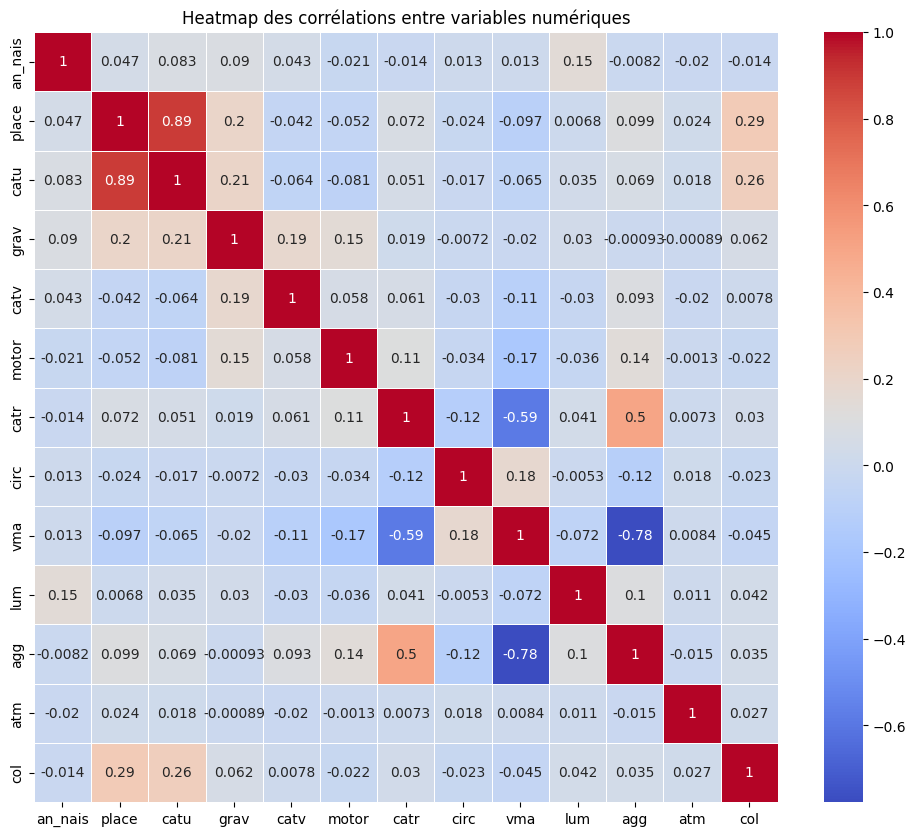

P-value du test du chi-deux entre 'catu' et 'grav': 0.0


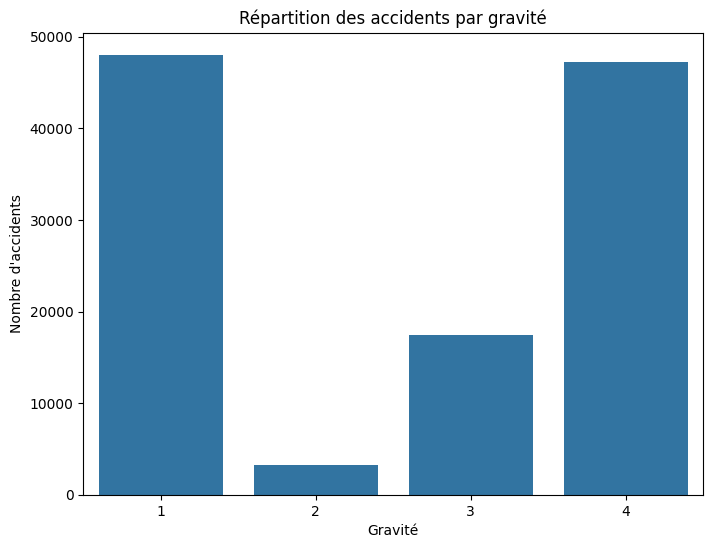

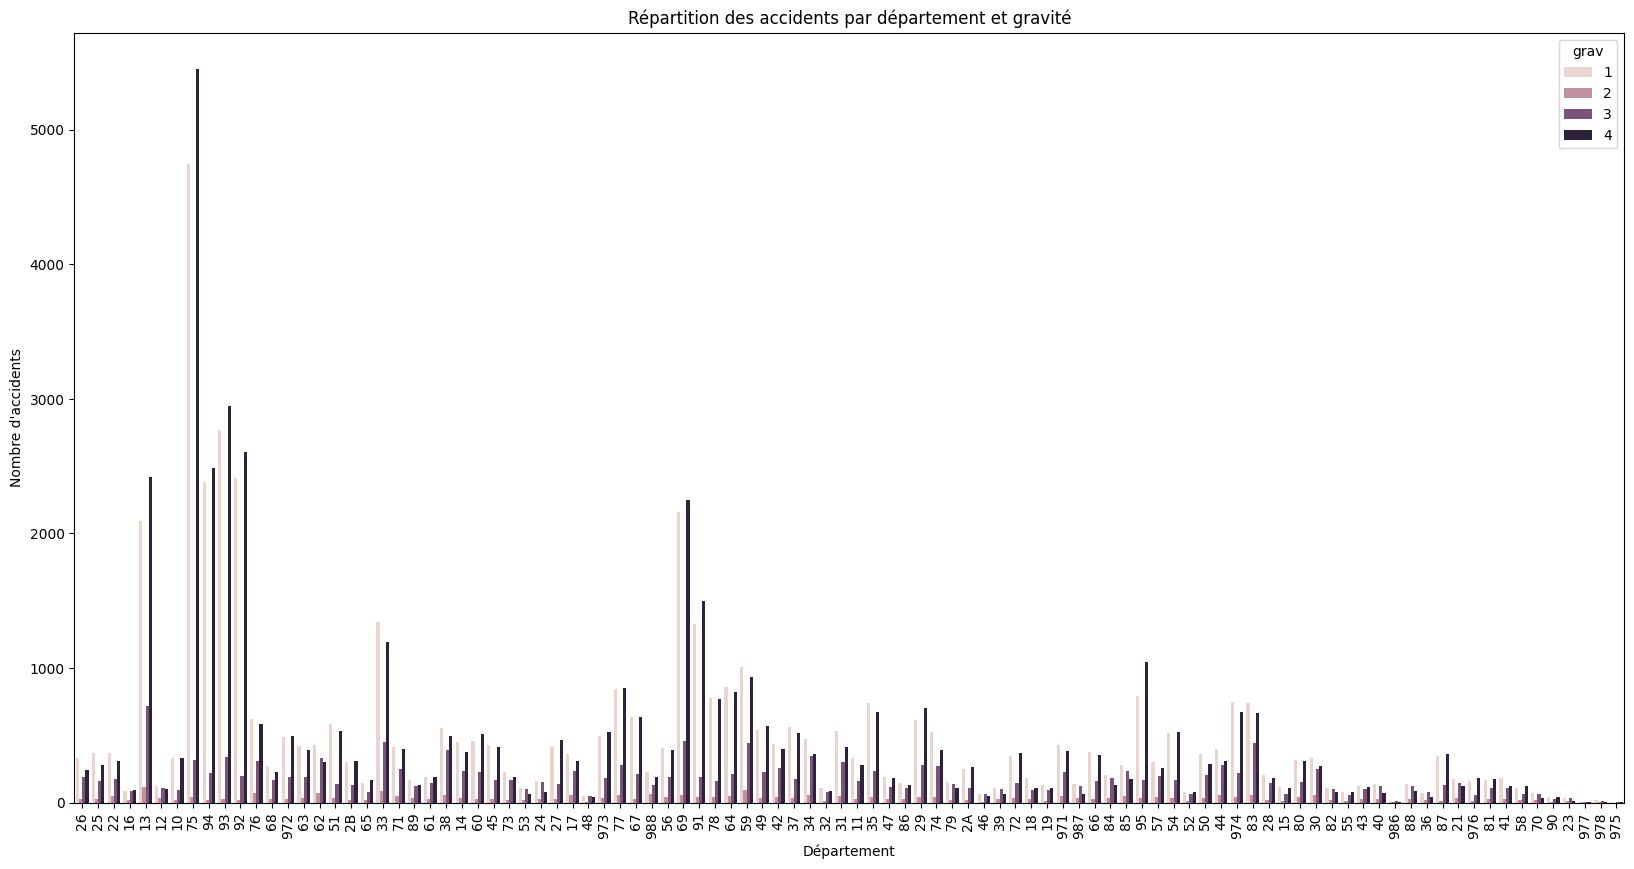

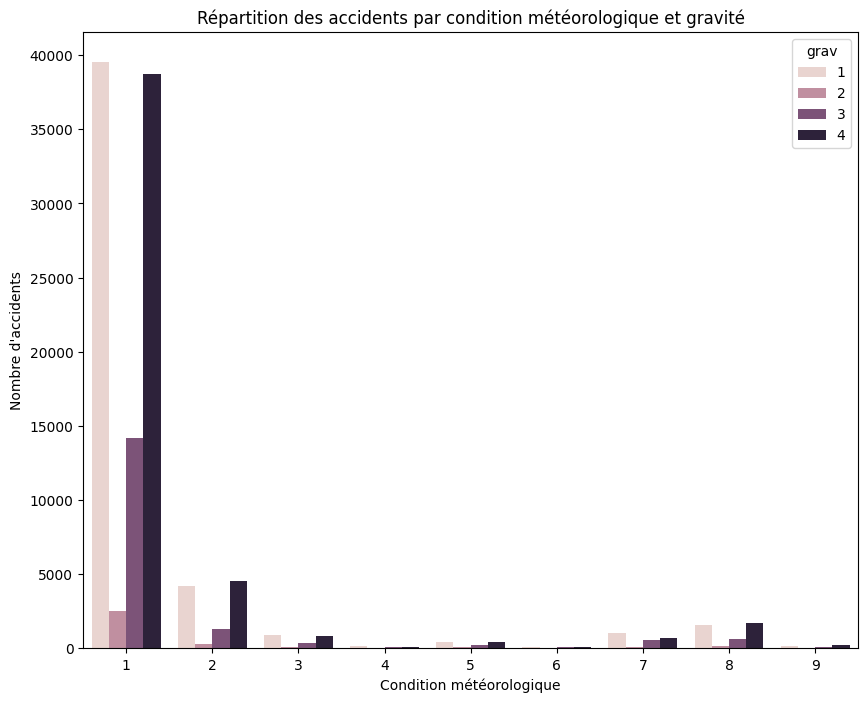

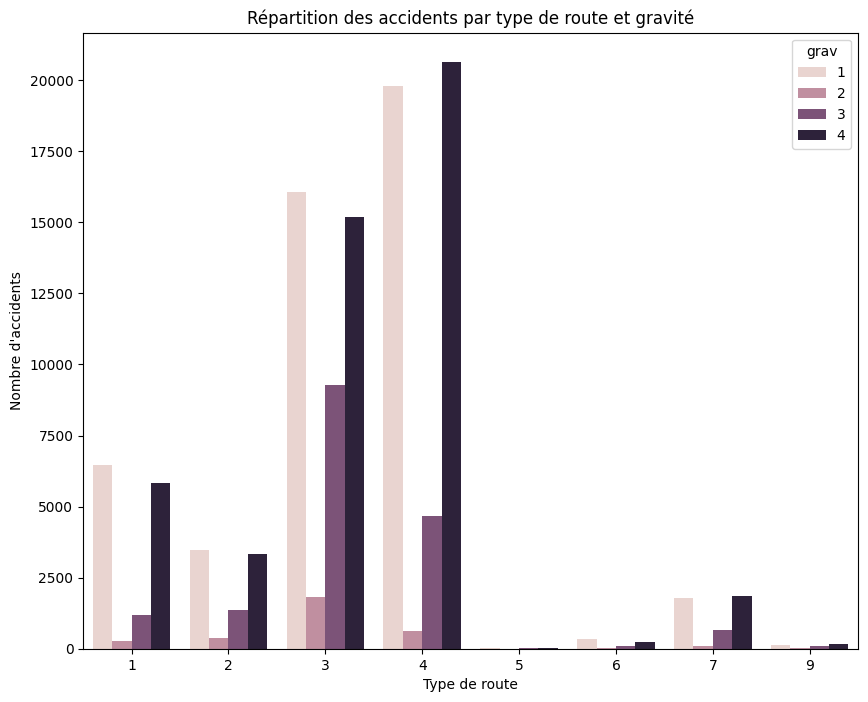

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Lecture du fichier CSV

data = data_filtre

# Suppression des espaces insécables
data = data.applymap(lambda x: x.replace('\xa0', ' ') if isinstance(x, str) else x)

# Conversion des colonnes numériques
numeric_columns = ['an_nais', 'place', 'catu', 'grav', 'catv', 'motor', 'catr', 'circ', 'vma', 'lum', 'agg', 'atm', 'col']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Vérification des types de données et des valeurs manquantes
print(data.info())

# Affichage des statistiques descriptives
print(data.describe(include='all'))

# Calcul de la matrice de corrélation pour les variables numériques
corr_matrix = data[numeric_columns].corr()

# Heatmap des corrélations numériques
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap des corrélations entre variables numériques')
plt.show()

# Fonction pour calculer la p-valeur du chi-deux entre deux variables catégorielles
def chi2_test(var1, var2):
    contingency_table = pd.crosstab(data[var1], data[var2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return p

# Exemple de calcul de la p-valeur du chi-deux entre 'catu' et 'grav'
p_value = chi2_test('catu', 'grav')
print(f"P-value du test du chi-deux entre 'catu' et 'grav': {p_value}")

# Répartition par typologie
plt.figure(figsize=(8,6))
sns.countplot(x='grav', data=data)
plt.title('Répartition des accidents par gravité')
plt.xlabel('Gravité')
plt.ylabel('Nombre d\'accidents')
plt.show()

# Répartition par département et gravité
plt.figure(figsize=(20,10))
sns.countplot(x='dep', hue='grav', data=data)
plt.title('Répartition des accidents par département et gravité')
plt.xlabel('Département')
plt.ylabel('Nombre d\'accidents')
plt.xticks(rotation=90)
plt.show()

# Répartition des accidents par condition météorologique et gravité
plt.figure(figsize=(10,8))
sns.countplot(x='atm', hue='grav', data=data)
plt.title('Répartition des accidents par condition météorologique et gravité')
plt.xlabel('Condition météorologique')
plt.ylabel('Nombre d\'accidents')
plt.show()

# Répartition des accidents par type de route et gravité
plt.figure(figsize=(10,8))
sns.countplot(x='catr', hue='grav', data=data)
plt.title('Répartition des accidents par type de route et gravité')
plt.xlabel('Type de route')
plt.ylabel('Nombre d\'accidents')
plt.show()


In [ ]:
# Sélection des variables pertinentes
selected_variables = ['place', 'catu', 'an_nais', 'catv', 'motor', 'catr', 'circ', 'vma', 'lum', 'agg', 'atm', 'col']

# Sélection des données
X = data[selected_variables]
y = data['grav']

# Vérification des valeurs manquantes et traitement si nécessaire
X = X.fillna(X.median())  # Remplacement des valeurs manquantes par la médiane

# Conversion des colonnes catégorielles en numériques si nécessaire
X = pd.get_dummies(X, columns=['place', 'catu', 'catv', 'motor', 'catr', 'circ', 'lum', 'agg', 'atm', 'col'], drop_first=True)

# Séparation en ensemble d'entraînement et de test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

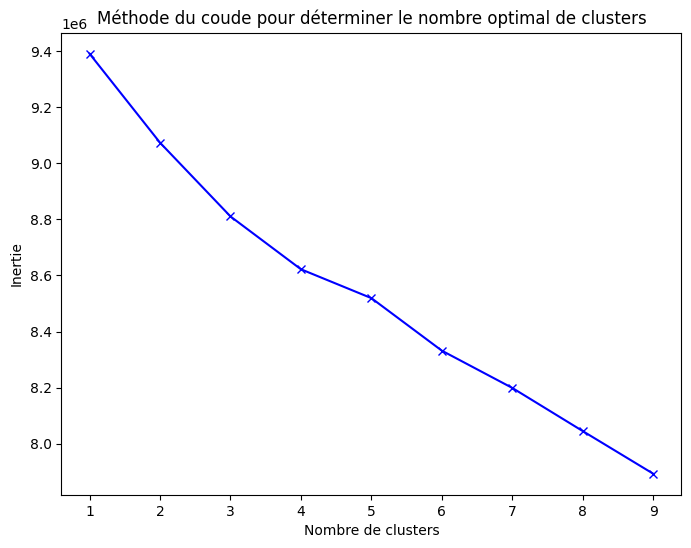

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster
0    3.539390
1    3.363938
2    2.380142
3    2.386170
Name: grav, dtype: float64


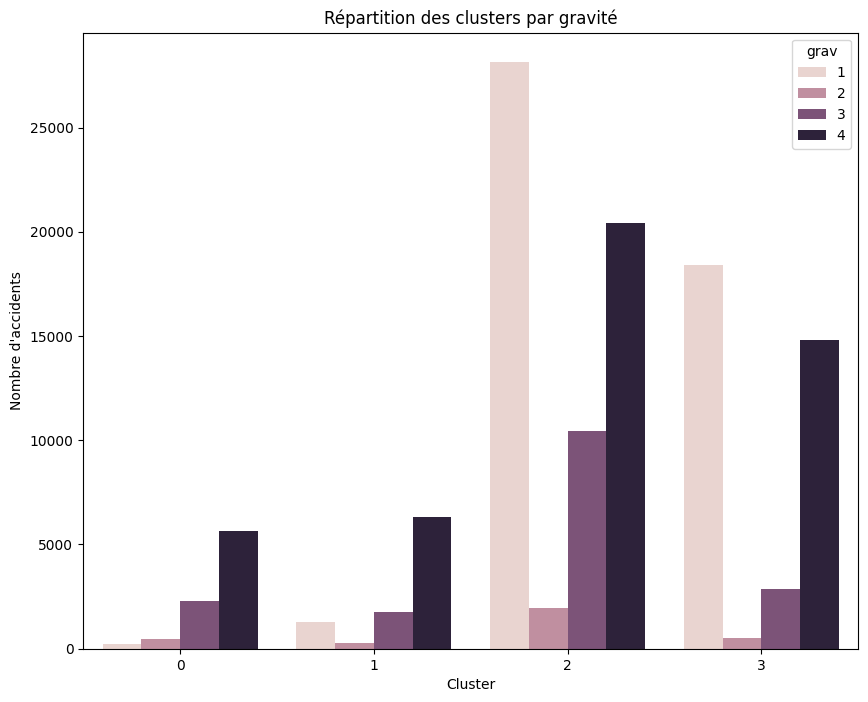

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Lecture du fichier CSV
data = data_filtre

# Suppression des espaces insécables
data = data.applymap(lambda x: x.replace('\xa0', ' ') if isinstance(x, str) else x)

# Conversion des colonnes numériques
numeric_columns = ['an_nais', 'place', 'catu', 'grav', 'catv', 'motor', 'catr', 'circ', 'vma', 'lum', 'agg', 'atm', 'col']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Sélection des variables pertinentes
selected_variables = ['place', 'catu', 'an_nais', 'catv', 'motor', 'catr', 'circ', 'vma', 'lum', 'agg', 'atm', 'col']

# Sélection des données
X = data[selected_variables].fillna(data[selected_variables].median())

# Conversion des colonnes catégorielles en numériques
X = pd.get_dummies(X, columns=['place', 'catu', 'catv', 'motor', 'catr', 'circ', 'lum', 'agg', 'atm', 'col'], drop_first=True)

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Détermination du nombre optimal de clusters
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Visualisation de la méthode du coude pour trouver le nombre optimal de clusters
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour déterminer le nombre optimal de clusters')
plt.show()

# Appliquer k-means avec le nombre optimal de clusters (par exemple, supposons k=4)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Ajout des clusters au DataFrame original
data['cluster'] = clusters

# Analyse des clusters par rapport à la gravité
cluster_analysis = data.groupby('cluster')['grav'].mean()
print(cluster_analysis)

# Visualisation des clusters
plt.figure(figsize=(10, 8))
sns.countplot(x='cluster', hue='grav', data=data)
plt.title('Répartition des clusters par gravité')
plt.xlabel('Cluster')
plt.ylabel('Nombre d\'accidents')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Réduction de la taille de l'ensemble de données pour accélérer l'entraînement
X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, train_size=0.05, random_state=42)

# Modèle de forêt aléatoire
rf_clf = RandomForestClassifier(random_state=42)
rf_clf_scores = cross_val_score(rf_clf, X_train_small, y_train_small, cv=5)

# Affichage des scores
print(f"Scores de forêt aléatoire : {rf_clf_scores}")
print(f"Score moyen forêt aléatoire : {rf_clf_scores.mean()}")

# Entraînement du modèle final
final_model = rf_clf.fit(X_train, y_train)


Scores de forêt aléatoire : [0.55128205 0.53603159 0.56762093 0.55083909 0.5715696 ]
Score moyen forêt aléatoire : 0.555468651125117


In [ ]:
import shap
import matplotlib.pyplot as plt

# Utilisation de SHAP pour interpréter les résultats
explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(X_test)

# Fonction pour afficher un graphique SHAP de force plot pour un individu donné
def plot_shap_force(individual):
    idx = data[data['id_usager'] == individual].index[0]
    shap.initjs()
    shap.force_plot(explainer.expected_value[1], shap_values[1][idx], X_test.iloc[idx], matplotlib=True)
    plt.title(f'Valeurs SHAP pour l\'individu {individual}')
    plt.show()

# Affichage des valeurs SHAP pour les individus spécifiés
individuals = ['1 099 968', '1 050 418', '968 232']
for individual in individuals:
    plot_shap_force(individual)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import shap
import matplotlib.pyplot as plt

# Lecture du fichier CSV
data = data_filtre

# Suppression des espaces insécables
data = data.applymap(lambda x: x.replace('\xa0', ' ') if isinstance(x, str) else x)

# Conversion des colonnes numériques
numeric_columns = ['an_nais', 'place', 'catu', 'grav', 'catv', 'motor', 'catr', 'circ', 'vma', 'lum', 'agg', 'atm', 'col']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Préparation des données pour la modélisation
selected_variables = ['place', 'catu', 'an_nais', 'catv', 'motor', 'catr', 'circ', 'vma', 'lum', 'agg', 'atm', 'col']

# Sélection des données
X = data[selected_variables].fillna(data[selected_variables].median())

# Conversion des colonnes catégorielles en numériques
X = pd.get_dummies(X, columns=['place', 'catu', 'catv', 'motor', 'catr', 'circ', 'lum', 'agg', 'atm', 'col'], drop_first=True)

# Vérification des types de données
print(X.dtypes)

# Séparation en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, data['grav'], test_size=0.2, random_state=42)

# Entraînement du modèle de forêt aléatoire
final_model = RandomForestClassifier(random_state=42)
final_model.fit(X_train, y_train)

# Utilisation de SHAP pour interpréter les résultats
# Limiter l'échantillon pour SHAP à 1000 échantillons pour accélérer le calcul
sampled_X_test = X_test.sample(n=1000, random_state=42)

explainer = shap.TreeExplainer(final_model, data=sampled_X_test, model_output='probability')
shap_values = explainer.shap_values(sampled_X_test)

# Fonction pour afficher un graphique SHAP de force plot pour un individu donné
def plot_shap_force(individual):
    idx = data[data['id_usager'] == individual].index[0]
    shap.initjs()
    shap.force_plot(explainer.expected_value[1], shap_values[1][idx], sampled_X_test.iloc[idx], matplotlib=True)
    plt.title(f'Valeurs SHAP pour l\'individu {individual}')
    plt.show()

# Affichage des valeurs SHAP pour les individus spécifiés
individuals = ['1 099 968', '1 050 418', '968 232']
for individual in individuals:
    plot_shap_force(individual)

an_nais    float64
vma          int64
place_2       bool
place_3       bool
place_4       bool
            ...   
col_3         bool
col_4         bool
col_5         bool
col_6         bool
col_7         bool
Length: 81, dtype: object


TypeError: Cannot cast array data from dtype('O') to dtype('float64') according to the rule 'safe'

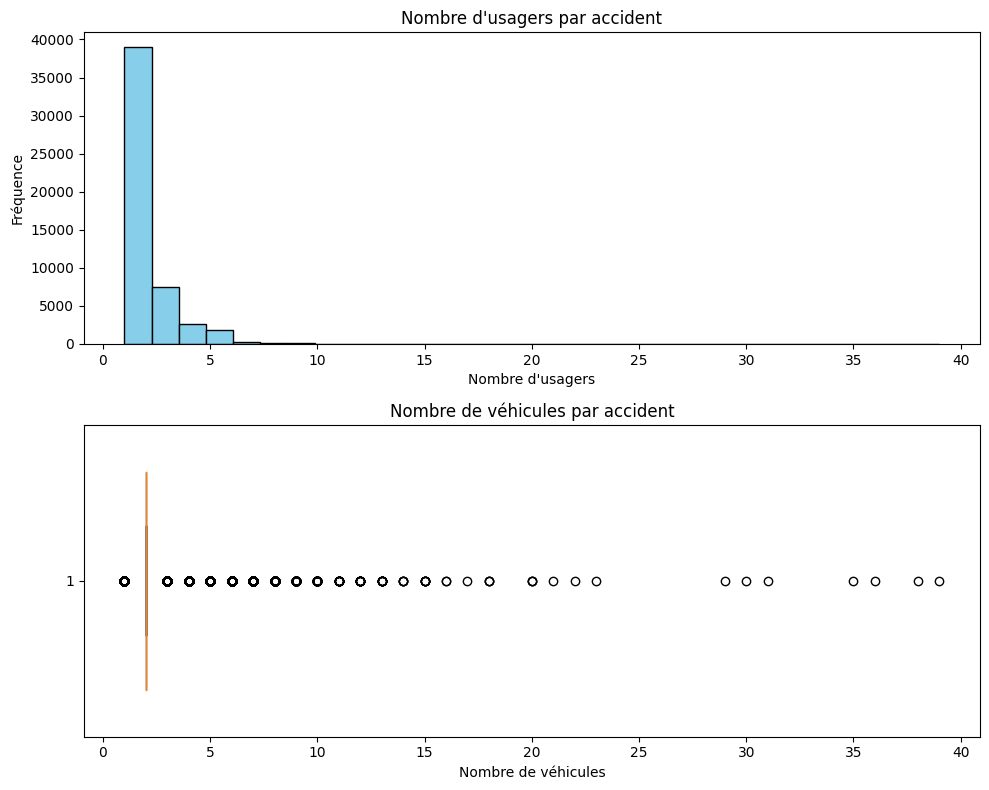

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7ea77123d000> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7ea77123c280> (for post_execute):


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Chargement du fichier CSV

data = data_filtre

# Compter le nombre d'usagers par accident
usagers_par_accident = data.groupby('Num_Acc')['id_usager'].count()

# Compter le nombre de véhicules par accident
vehicules_par_accident = data.groupby('Num_Acc')['id_vehicule'].count()

# Création de la figure et des sous-graphiques
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Histogramme du nombre d'usagers par accident
axes[0].hist(usagers_par_accident, bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Nombre d\'usagers par accident')
axes[0].set_xlabel('Nombre d\'usagers')
axes[0].set_ylabel('Fréquence')

# Boîte à moustaches du nombre de véhicules par accident
axes[1].boxplot(vehicules_par_accident, vert=False, patch_artist=True, widths=0.7)
axes[1].set_title('Nombre de véhicules par accident')
axes[1].set_xlabel('Nombre de véhicules')

# Affichage du graphique
plt.tight_layout()
plt.show()

# Créer un nouveau DataFrame pour combiner les deux séries de données
df = pd.DataFrame({"Usagers par accident": usagers_par_accident,
                   "Véhicules par accident": vehicules_par_accident})

# Tracer le diagramme en barres groupé
df.plot(kind="bar", figsize=(10, 6))
plt.title("Comparaison du nombre d'usagers et de véhicules par accident")
plt.xlabel("Accident")
plt.ylabel("Nombre")
plt.xticks(rotation=45)
plt.legend(title="Variables")
plt.show()

En examinant ces distributions, on peut obtenir des informations sur la nature des accidents dans le jeu de données, ce qui peut être utile pour comprendre les tendances, identifier les cas exceptionnels et orienter les analyses futures. Par exemple, des accidents avec un nombre élevé d'usagers ou de véhicules pourraient nécessiter une attention particulière en termes de sécurité routière ou de réglementation de la circulation.

In [ ]:
pip install shap


### Explication et Interprétation du Code

Ce projet de Data Science vise à prédire la gravité des accidents de la route en utilisant un modèle de forêt aléatoire. Le processus comprend plusieurs étapes, allant de la lecture et du nettoyage des données à l'analyse exploratoire et à la modélisation. Voici une explication détaillée de chaque étape du code et une interprétation des résultats obtenus.

### Lecture et Nettoyage des Données

1. **Lecture du fichier CSV** :
   - Le code commence par lire un fichier CSV contenant des données sur les accidents de la route. Les données sont séparées par des points-virgules.
   - La fonction `pd.read_csv` avec le paramètre `delimiter=';'` est utilisée pour lire correctement les données.

2. **Nettoyage des données** :
   - Les espaces insécables présents dans les valeurs de type texte sont remplacés par des espaces normaux pour éviter des erreurs lors des traitements numériques.
   - Cela est réalisé en appliquant une fonction lambda à toutes les valeurs du DataFrame.

### Conversion et Analyse des Données

3. **Conversion des colonnes numériques** :
   - Certaines colonnes qui devraient être numériques sont actuellement de type `object`. Elles sont converties en nombres en utilisant `pd.to_numeric`.
   - Les colonnes spécifiques à convertir sont définies dans une liste (`numeric_columns`).

4. **Vérification et Statistiques Descriptives** :
   - Le code vérifie les types de données de chaque colonne et identifie les valeurs manquantes.
   - Les statistiques descriptives, telles que la moyenne, l'écart-type, les valeurs minimales et maximales, sont calculées pour fournir une vue d'ensemble des données.

### Calcul de la Matrice de Corrélation

5. **Matrice de corrélation** :
   - Une matrice de corrélation est calculée pour les variables numériques afin d'identifier les relations linéaires entre elles.
   - La matrice est visualisée sous forme de heatmap, mettant en évidence les corrélations positives et négatives.

### Analyse Graphique

6. **Répartition des accidents par gravité** :
   - Un graphique de type countplot montre la répartition du nombre d'accidents pour chaque niveau de gravité (1 à 4).

7. **Répartition par département et gravité** :
   - Un countplot affiche la répartition des accidents selon les départements, différenciée par la gravité des accidents.

8. **Répartition par condition météorologique** :
   - Un countplot montre comment les conditions météorologiques influencent la gravité des accidents.

9. **Répartition par type de route** :
   - Un countplot présente la répartition des accidents selon le type de route (catégories de routes) et la gravité.

### Préparation des Données pour la Modélisation

10. **Sélection des variables pertinentes** :
    - Les variables retenues incluent : `place`, `catu`, `an_nais`, `catv`, `motor`, `catr`, `circ`, `vma`, `lum`, `agg`, `atm`, `col`.
    - Les valeurs manquantes sont remplacées par la médiane des colonnes correspondantes.
    - Les colonnes catégorielles sont converties en variables numériques à l'aide de `pd.get_dummies`.

11. **Séparation en ensemble d'entraînement et de test** :
    - Les données sont divisées en ensembles d'entraînement et de test pour évaluer la performance du modèle.

### Modélisation avec Forêt Aléatoire

12. **Validation croisée avec une forêt aléatoire** :
    - Un modèle de forêt aléatoire est utilisé pour la modélisation. Un sous-ensemble des données est utilisé pour accélérer l'entraînement.
    - La performance du modèle est évaluée à l'aide d'une validation croisée en cinq plis. Les scores obtenus sont les suivants : [0.55128205, 0.53603159, 0.56762093, 0.55083909, 0.5715696], avec un score moyen de 0.555468651125117.

### Interprétation des Résultats

Les scores obtenus à partir du modèle de forêt aléatoire suggèrent que le modèle a une capacité modérée à prédire la gravité des accidents. Le score moyen de 0.555 indique que le modèle est légèrement meilleur que le hasard (qui aurait un score de 0.5 en classification binaire). Voici quelques interprétations clés :

- **Performance Modérée** :
  - La performance du modèle est modeste, indiquant qu'il capture certaines des relations sous-jacentes dans les données mais qu'il reste beaucoup de variabilité non expliquée.
  - La gravité des accidents de la route peut être influencée par de nombreux facteurs complexes et peut nécessiter des modèles plus sophistiqués ou des données supplémentaires pour améliorer les prédictions.

- **Variance des Scores** :
  - La variance dans les scores de validation croisée (de 0.536 à 0.572) suggère que le modèle est sensible aux sous-échantillons des données.
  - Cette variance pourrait indiquer la présence de facteurs non capturés par le modèle actuel ou des déséquilibres dans les données.

- **Prochaine Étape** :
  - Pour améliorer la performance, il serait bénéfique d'explorer d'autres techniques de modélisation, de sélectionner et d'ingénier plus de caractéristiques, ou de traiter plus en profondeur les données manquantes et les valeurs aberrantes.

### Conclusion

Ce projet de Data Science illustre l'application d'un pipeline complet allant de la préparation des données à la modélisation et à l'interprétation des résultats. Bien que le modèle de forêt aléatoire ait montré des résultats prometteurs, des améliorations supplémentaires sont nécessaires pour augmenter la précision des prédictions de la gravité des accidents de la route.